# SpotiPy Connect & Web Scraping
I want to find out who I listen to and what their basic background is.
[Medium Article](https://medium.com/@RareLoot/extracting-spotify-data-on-your-favourite-artist-via-python-d58bc92a4330)
[Examples](https://github.com/plamere/spotipy/tree/master/examples)

In [3]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import matplotlib.pyplot as plt
import numpy as np
import os
from client_secret import *

## Spotify API Connection

In [4]:
def spotify_connect(user_scope, redirect_uri, artist_limit, time_range):
    """Connects to Spotify API, returning user's top artists"""
    
    # Load in secret keys
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    client = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Create security token
    security_token = util.prompt_for_user_token(username, user_scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
    
    # Gets favourite artists 
    if security_token:
        spotify_client = spotipy.Spotify(auth=security_token)
        spotify_client.trace = False
        # Loop through time ranges
        for r in time_range:
            results = spotify_client.current_user_top_artists(time_range=r, limit=artist_limit)
        return results
    
scope = "user-top-read"
redirect_uri = "http://localhost:8080"

results = spotify_connect(scope, redirect_uri, 50, ['short_term', 'medium_term', 'long_term'])

&nbsp;
### Load Results into DataFrame

In [5]:
def make_df(response):
    """Pass results from Spotfy API call and returns cleaned DataFrame"""
    items = pd.DataFrame(response['items'])
    # Drop unnecessary columns
    items = items.drop(['external_urls', 'href', 'id', 'images', 'uri'], axis=1)
    # Followes column needs cleaning
    for i in range(0, len(items)):
        items.followers[i] = items.followers[i]['total']

    return items.sort_values(by='popularity', ascending=False)
    
    
artists = make_df(results)
artists

<ipython-input-5-21d38590777f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items.followers[i] = items.followers[i]['total']


,followers,genres,name,popularity,type
6,47338465,"[canadian hip hop, canadian pop, hip hop, pop ...",Drake,100,artist
38,10455541,[rap],Travis Scott,98,artist
3,10202571,"[chicago rap, melodic rap]",Juice WRLD,97,artist
1,21386681,"[canadian contemporary r&b, canadian pop, pop]",The Weeknd,97,artist
15,28187335,"[electropop, pop]",Billie Eilish,94,artist
31,14741988,"[conscious hip hop, hip hop, rap, west coast rap]",Kendrick Lamar,90,artist
2,16545221,"[beatlesque, british invasion, classic rock, m...",The Beatles,90,artist
16,26598106,"[glam rock, rock]",Queen,90,artist
24,24842208,"[brostep, pop, progressive electro house]",Marshmello,89,artist
5,8005661,"[atl hip hop, rap, trap]",21 Savage,87,artist


### Plot Favourites

<BarContainer object of 10 artists>

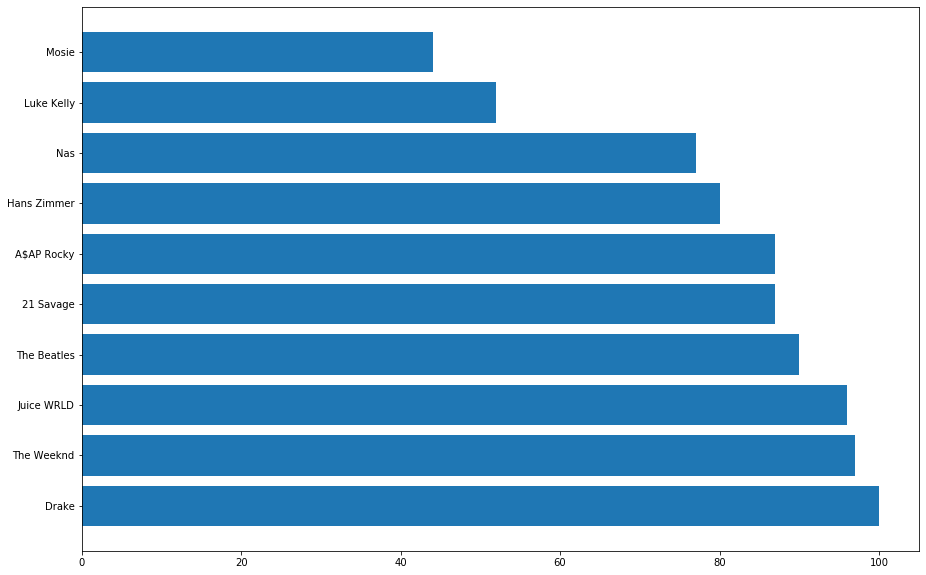

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(artists.name, artists.popularity)

# Scrape Artist Ethnicity
https://ethnicelebs.com/

In [4]:
# from bs4 import BeautifulSoup as bs4
# import requests

## Scrape all paragraphs on page

In [5]:
# def get_paragraph(artist_name):
#     headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}
#     base_url = "https://ethnicelebs.com/"
    
#     # Parsed artists name
#     parse_name = artist_name.replace(" ", "-")
#     req = requests.get(base_url+parse_name, headers=headers)
#     soup = bs4(req.content, "html.parser")

#     # Find all <p> elements
#     para = str(soup.find_all('p'))

#     # Find range of string
#     string_start = para.find("Ethnicity: ") + len("Ethnicity: ")
#     string_end = para.find("</strong")
#     race = para[string_start:string_end]
    
#     if len(race) < 100:
#         return race


&nbsp;
### Add races for each artist in df
Using BeautifulSoup is really slow.

In [6]:
# # Iterate over names and scrape
# races = []
# for artist in artists.name:
#     races.append(get_paragraph(artist))

In [7]:
# # Convert to Pandas Series and add to df
# artists_races = pd.Series( v for v in races )    
# artists['race'] = artists_races
# artists.head(5)

#### Plot specific races
This plot has many specific races which gives a very messy graph. Grouping the ethnicities and removing the None values would be an improvement

In [8]:
# fig, ax = plt.subplots(figsize=(22,7))
# artists.plot.barh(x ='race', y='popularity', ax=ax)

&nbsp;
### Group ethnicities
- The artists not found from scraping are 'Unknown
- Some *assumptions* for the other races

In [9]:
# artists.race.loc[ artists.race.isnull() == True ] = 'Unknown'
# artists.race.loc[ artists.race.str.contains('English|Irish|Jewish') == True ] = 'White'
# artists.race.loc[ artists.race.str.contains('African|Black|Ethiopian') == True ] = 'Black'

#### Plot grouped races
- count() prevents popularity playing a role in the numbers
- unstack() breaks the groupby into further groups (not sure)

In [10]:
# fig, ax = plt.subplots(figsize=(15,7))

# # Group and plot
# artists.groupby('race').count().unstack().popularity.plot.bar(ax=ax)

&nbsp;
# ScraPy Efficient Scraping
BeautifulSoup was useful for starting off with scraping but it is pretty slow. ScraPy requires a little more setup but supports asynchrony making it a lot faster.

### Defining the Spider
A spider in ScraPy is a class written in Python to define the way data will be searched and parsed on the website.

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess

class EthnicScraperSpider(scrapy.Spider):
    """Scrapes ethnic celebs website using XPath selector"""
    name = 'ethnic-scraper'
    allowed_domains = ['ethnicelebs.com'] 
    
    def __init__(self, artist='', *args, **kwargs):
        """Takes artist as an argument when called"""
        super(EthnicScraperSpider, self).__init__(*args, **kwargs)
        self.start_urls = [f'https://ethnicelebs.com/{artist}']

    def parse(self, response):
        """Get artist race"""
        next_page = response.xpath('/html/body/div/div/div/div/div/section/div[2]/article/div/div[2]/div[1]/p[4]/strong/text()').get()
        # Find word and exclude
        string_start = next_page.find("Ethnicity: ") + len("Ethnicity: ")
        race = next_page[string_start:len(next_page)]
        
        yield {
            'race': race
        } 

### Crawl for 21 Savage & Ye

In [3]:
# # Setup scraper
# process = CrawlerProcess({
#     'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36',
#     'FEED_FORMAT': 'json',
#     'FEED_URI': '123.json',
#     'CONCURRENT_ITEMS': 1
# # })

# crawler = process.create_crawler(EthnicScraperSpider)
# process.crawl(crawler, artist='21-savage')
# process.start()

&nbsp;
## Defining the Wikipedia Spider
After looking at some of the artists on Wikipedia, spaces in the URL seems to be filled with underscores-as opposed to dashes in ethniccelebs. This Spider will find the country of origin and the age of the artist.

In [4]:
import scrapy
from scrapy.crawler import CrawlerProcess

class WikiSpider(scrapy.Spider):
    """Scrapes Wikipedia using CSS selector"""
    name = "wiki"
    allowed_domains = ['wikipedia.org'] 
    start_urls = ['https://wikipedia.org/wiki/']

    def __init__(self, artist='', *args, **kwargs):
        """Takes artist as an argument when called"""
        # Replaces spaces with "_" for website
        artist = artist.replace(" ", "_")
        self.start_urls = [f'https://wikipedia.org/wiki/{artist}']

    def parse(self, response):
        """Get artist race"""    
        # Trim brackets and age
        age = response.xpath('/html/body/div[3]/div[3]/div[4]/div/table[1]/tbody/tr[5]/td/span[2]/text()').get()
        age = age.strip(')').lstrip(' (age ')

        country = response.xpath('/html/body/div[3]/div[3]/div[4]/div/table[1]/tbody/tr[6]/td/text()').get()
        region = response.xpath('/html/body/div[3]/div[3]/div[4]/div/table[1]/tbody/tr[6]/td/a[2]/text()').get()
    
        yield {
            'country': country,
            'region': region,
            'age': age
        }
    
# # Setup scraper
# process = CrawlerProcess({
#     'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
# })

# # Instantiate class and pass artist
# process.crawl(WikiSpider, artist='21 Savage')
# process.start()

&nbsp;
## Music Brainz API
Open music API with a Python binding allowing artists to be searched and their details returned. When passed an artist name the function below returns a dictionary including gender country, city, district and age. 

In [6]:
import musicbrainzngs as brainz
from datetime import date
import datetime as dt
import math
import pandas as pd
import time
import pprint as pp

def artist_area(area):
    """Pass artist dictionary and return area information"""
    district = 'n/a'
    city = 'n/a'
    # Check area name and type
    if 'type' in area and 'name' in area:
        # Is it a district or a city?
        if area['type'] == 'District':
            district = area['name']
        elif area['type'] == 'City':
            city = area['name']   
    
    return district, city


def parse_date(born_dt, born_str):
    """Pass blank datetime and JSON string and returns parsed datetime"""
    if len(born_str) == 10:
        born_dt = dt.datetime.strptime(born_str, '%Y-%m-%d').date()
    elif len(born_str) == 7:
        born_dt = dt.datetime.strptime(born_str, '%Y-%m').date()
    elif len(born_str) == 4:
        born_dt = dt.datetime.strptime(born_str, '%Y').date()
    return born_dt


def get_brainz_artist(artist_name):
    """Pass artist name and returns age, country and gender"""
    # Set name of app
    brainz.set_useragent('lxm', version='1')

    # Get first artist in search
    artist = brainz.search_artists(artist_name, limit=1)['artist-list'][0]

    # Check gender key in JSON
    if 'type' in artist:    
        artist_t = artist['type']
        # Check if solo artist
        if artist_t == 'Person':
            gender = artist['gender']
            artist_type = 'person'
        elif artist_t == 'Group':
            gender = 'mixed'
            artist_type = 'group'
    else:
        gender = artist_type = 'n/a'
        
    # Check country key and assign value
    country = artist['country'] if 'country' in artist else 'n/a'
    
    district1 = district2 = district3 = city1 = city2 = city3 = 'n/a'
    # Check area key
    if 'area' in artist:
        district1 = artist_area(artist['area'])[0]
        city1 = artist_area(artist['area'])[1]
    
    # Check begin-area key
    if 'begin-area' in artist:
        district2 = artist_area(artist['begin-area'])[0]
        city2 = artist_area(artist['begin-area'])[1]
        
    # Check end-area key
    if 'end-area' in artist:
        district3 = artist_area(artist['end-area'])[0]
        city3 = artist_area(artist['end-area'])[1]
    
    age = 0
    # Check life-span key
    if 'life-span' in artist:
        if 'begin' in artist['life-span']:
            # Convert string to Date
            born_s = artist['life-span']['begin']
            born = dt.date(2000,1,1)
            born = parse_date(born, born_s)
                
            # Passed away and not in group
            if 'end' in artist['life-span'] and artist_type != 'group':
                end_s = artist['life-span']['end']
                end = dt.date(2000,1,1)
                end = parse_date(end, end_s)
                
                age = end - born           
            else:
                # Find age as of today
                age = date.today() - born
            
            # Get age in years
            age = math.floor(age.days/365)
            
    if age == 0:
        age = 'n/a'
   
    return {
        'artist': artist_name,
        'gender': gender, 
        'age': age,
        'type': artist_type,
        'country': country, 
        'city_1': city1,
        'district_1': district1,
        'city_2': city2,
        'district_2': district2,
        'city_3': city3,
        'district_3': district3    
    }

artist_info = []
for artist in artists.name:
    artist_info.append(get_brainz_artist(artist))
    print(get_brainz_artist(artist))
    time.sleep(1)
    
df = pd.DataFrame(artist_info)

{'artist': 'Drake', 'gender': 'male', 'age': 33, 'type': 'person', 'country': 'CA', 'city_1': 'n/a', 'district_1': 'n/a', 'city_2': 'Toronto', 'district_2': 'n/a', 'city_3': 'n/a', 'district_3': 'n/a'}
{'artist': 'Travis Scott', 'gender': 'male', 'age': 28, 'type': 'person', 'country': 'US', 'city_1': 'n/a', 'district_1': 'n/a', 'city_2': 'Houston', 'district_2': 'n/a', 'city_3': 'n/a', 'district_3': 'n/a'}
{'artist': 'Juice WRLD', 'gender': 'male', 'age': 21, 'type': 'person', 'country': 'US', 'city_1': 'n/a', 'district_1': 'n/a', 'city_2': 'Chicago', 'district_2': 'n/a', 'city_3': 'Oak Lawn', 'district_3': 'n/a'}
{'artist': 'The Weeknd', 'gender': 'male', 'age': 30, 'type': 'person', 'country': 'CA', 'city_1': 'n/a', 'district_1': 'n/a', 'city_2': 'Scarborough', 'district_2': 'n/a', 'city_3': 'n/a', 'district_3': 'n/a'}
{'artist': 'Billie Eilish', 'gender': 'female', 'age': 18, 'type': 'person', 'country': 'US', 'city_1': 'n/a', 'district_1': 'n/a', 'city_2': 'Los Angeles', 'district

In [7]:
df

,artist,gender,age,type,country,city_1,district_1,city_2,district_2,city_3,district_3
0,Drake,male,33,person,CA,n/a,n/a,Toronto,n/a,n/a,n/a
1,Travis Scott,male,28,person,US,n/a,n/a,Houston,n/a,n/a,n/a
2,Juice WRLD,male,21,person,US,n/a,n/a,Chicago,n/a,Oak Lawn,n/a
3,The Weeknd,male,30,person,CA,n/a,n/a,Scarborough,n/a,n/a,n/a
4,Billie Eilish,female,18,person,US,n/a,n/a,Los Angeles,n/a,n/a,n/a
5,Kendrick Lamar,male,33,person,US,n/a,n/a,Compton,n/a,n/a,n/a
6,The Beatles,mixed,63,group,GB,n/a,n/a,Liverpool,n/a,n/a,n/a
7,Queen,mixed,50,group,GB,n/a,n/a,London,n/a,n/a,n/a
8,Marshmello,male,28,person,US,n/a,n/a,Philadelphia,n/a,n/a,n/a
9,21 Savage,male,27,person,US,n/a,n/a,n/a,Plaistow,n/a,n/a


In [114]:
import pprint as pp
brainz.set_useragent('hjvdksv', version='1')

artist = brainz.search_artists('The Beatles', limit=1)['artist-list'][0]#['area']
pp.pprint(artist)

{'alias-list': [{'alias': '披头士',
                 'locale': 'zh_Hans',
                 'primary': 'primary',
                 'sort-name': '披头士',
                 'type': 'Artist name'},
                {'alias': '披頭四',
                 'locale': 'zh_Hant',
                 'primary': 'primary',
                 'sort-name': '披頭四',
                 'type': 'Artist name'},
                {'alias': 'The Silver Beatles',
                 'locale': 'en',
                 'sort-name': 'Silver Beatles, The',
                 'type': 'Artist name'},
                {'alias': 'I Beatles',
                 'locale': 'it',
                 'sort-name': 'Beatles, I',
                 'type': 'Artist name'},
                {'alias': 'Die Beatles',
                 'locale': 'de',
                 'sort-name': 'Beatles, Die',
                 'type': 'Artist name'},
                {'alias': 'ბითლზი',
                 'locale': 'ka',
                 'sort-name': 'ბითლზი',
                 'type

### Cache Top 10k Songs in CSV/JSON

In [81]:
import pandas as pd
top_10k = pd.read_html('https://kworb.net/spotify/artists.html')[0]

top_10k.set_index('Pos', inplace=True)
top_10k = top_10k.drop(columns=['Total Streams'])

artist_info_10k = []
for artist in top_10k.Artist:
    artist_info_10k.append(get_brainz_artist(artist))
#     print(get_brainz_artist(artist))
    time.sleep(1)
    
df = pd.DataFrame(artist_info_10k)
# df

KeyboardInterrupt: 

In [ ]:
df.to_json()